#
## Kaggle Competition: Titanic

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

### Method 1: Logistic Regression

In [185]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [186]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
data_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [188]:
data_train.Age.fillna(data_train.Age.mean(), inplace=True)

In [189]:
data_train.drop(['Cabin'], axis=1, inplace=True)

In [190]:
data_train.Embarked.value_counts()
data_train.fillna('S', inplace=True)

In [191]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [192]:
data_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [193]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [194]:
data_train = data_train.join(pd.get_dummies(data_train.Embarked))
data_train = data_train.join(pd.get_dummies(data_train.Sex))

In [195]:
data_train.drop('Embarked', axis=1, inplace=True)
data_train.drop('Sex', axis=1, inplace=True)

In [196]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   C         891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
 9   female    891 non-null    uint8  
 10  male      891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [197]:
X = data_train.drop(['Survived'], axis=1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [198]:
logmodel = LogisticRegression()

In [199]:
logmodel.fit(X, y)

/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [200]:
auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:, 1])
print('AUC: %.3f' % auc)

AUC: 0.857


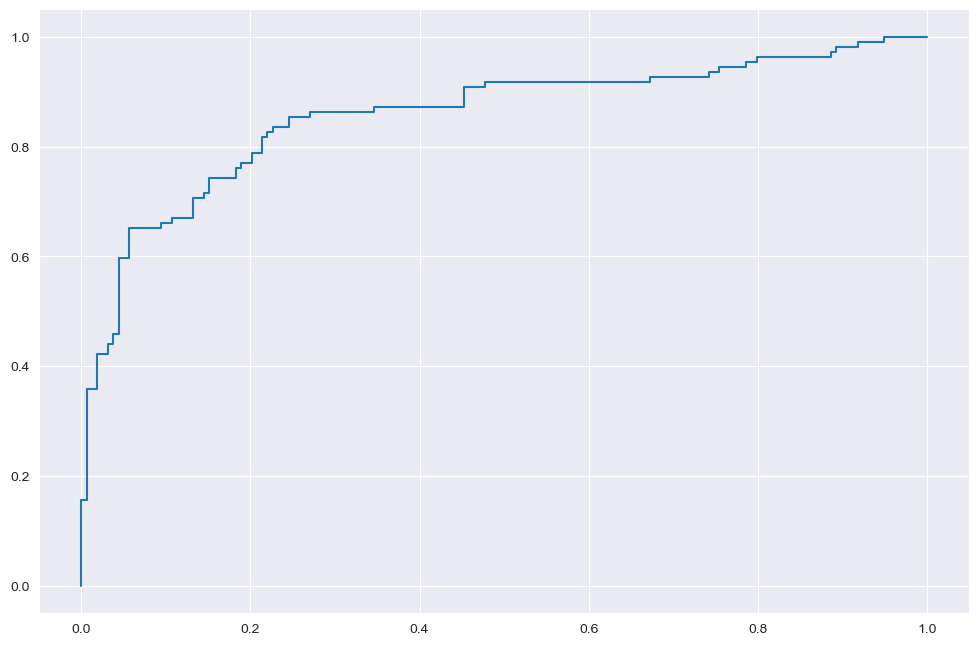

In [201]:
roc = roc_curve(y_test, logmodel.predict_proba(X_test)[:, 1])
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(roc[0], roc[1], label='ROC curve (area = %0.3f)' % auc)

In [202]:
R_squared = logmodel.score(X_test, y_test)
print('R^2: %.3f' % R_squared)

R^2: 0.791


In [203]:
y_pred = logmodel.predict(X_test)

In [204]:
print(confusion_matrix(y_test, y_pred))

[[139  20]
 [ 36  73]]


In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.78      0.67      0.72       109

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268


In [206]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [207]:
data_test.drop(['Cabin'], axis=1, inplace=True)
data_test.Age.fillna(data_test.Age.mean(), inplace=True)
data_test.Fare.fillna(data_test.Fare.mean(), inplace=True)
data_test = data_test.join(pd.get_dummies(data_test.Embarked))
data_test = data_test.join(pd.get_dummies(data_test.Sex))

In [208]:
data_test.drop('Embarked', axis=1, inplace=True)
data_test.drop('Sex', axis=1, inplace=True)

In [209]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   C            418 non-null    uint8  
 9   Q            418 non-null    uint8  
 10  S            418 non-null    uint8  
 11  female       418 non-null    uint8  
 12  male         418 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(5)
memory usage: 28.3+ KB


In [210]:
data_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [211]:
result_pre = logmodel.predict(data_test)

In [212]:
result = pd.read_csv('gender_submission.csv')

In [213]:
a = result['Survived'] == result_pre

In [214]:
a.value_counts()

True     394
False     24
Name: Survived, dtype: int64

### Method 2: Random Forest

In [215]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [216]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [217]:
data_train.drop('Cabin', axis=1, inplace=True)

In [218]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [219]:
data_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [220]:
data_train.Embarked.fillna('S', inplace=True)

In [221]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [222]:
data_train.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [223]:
sex = {'male': 1, 'female': 0}

data_train.Sex = data_train.Sex.map(lambda x: sex[x])

In [224]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [225]:
# random forest

from sklearn.ensemble import RandomForestRegressor

cons = data_train[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
cons = pd.get_dummies(cons)

cons_train = cons[cons.Age.notnull()]
cons_test = cons[cons.Age.isnull()]

In [226]:
cons_train_X = cons_train.drop('Age', axis=1)
cons_train_y = cons_train['Age']

In [227]:
random_forest = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
random_forest.fit(cons_train_X, cons_train_y)

RandomForestRegressor(n_estimators=2000, n_jobs=-1)

In [228]:
random_forest.score(cons_train_X, cons_train_y)

0.6966375907572309

In [229]:
result = random_forest.predict(cons_test.drop('Age', axis=1))

In [230]:
data_train.loc[data_train.Age.isnull(), 'Age'] = result

In [231]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [232]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100)

In [233]:
data_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [234]:
# data_train = data_train.join(pd.get_dummies(data_train.Embarked))
# data_train.drop('Embarked', axis=1, inplace=True)

t = {'S': 0, 'C': 1, 'Q': 2}
data_train.Embarked = data_train.Embarked.map(lambda x: t[x])

In [235]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,0
1,1,1,0,38.000000,1,0,71.2833,1
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0
887,1,1,0,19.000000,0,0,30.0000,0
888,0,3,0,17.122085,1,2,23.4500,0
889,1,1,1,26.000000,0,0,30.0000,1


In [236]:
X_train = data_train.drop(['Survived'], axis=1)
y_train = data_train['Survived']

In [237]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [238]:
RF_model.score(X_train, y_train)

0.9820426487093153

In [239]:
sex = {'male': 1, 'female': 0}
data_test.Sex = data_test.Sex.map(lambda x: sex[x])


In [240]:
# data_test.drop(['Cabin'], axis=1, inplace=True)

cons = data_test[['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
cons = pd.get_dummies(cons)

cons_train = cons[cons.Age.notnull()]
cons_test = cons[cons.Age.isnull()]

result = random_forest.predict(cons_test.drop('Age', axis=1))

data_test.loc[data_test.Age.isnull(), 'Age'] = result

In [241]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.725939,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,30.725939,0,0,359309,8.0500,NaN,S


In [242]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [243]:
t = {'S': 0, 'C': 1, 'Q': 2}
data_test.Embarked = data_test.Embarked.map(lambda x: t[x])

In [244]:
data_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [245]:
data_test.drop(['Cabin'], axis=1, inplace=True)

In [246]:
data_test.Fare.fillna(data_test.Fare.mean(), inplace=True)

In [247]:
result = RF_model.predict(data_test)

In [248]:
res = pd.read_csv('gender_submission.csv')

In [249]:
a = result == res.Survived

In [250]:
a.value_counts()

True     342
False     76
Name: Survived, dtype: int64

In [251]:
from sklearn.model_selection import cross_val_score

X = data_train.drop(['Survived'], axis=1)
y = data_train['Survived']

cross_val_score(RF_model, X, y, cv=10)


array([0.74444444, 0.7752809 , 0.74157303, 0.87640449, 0.88764045,
       0.80898876, 0.80898876, 0.76404494, 0.82022472, 0.85393258])

In [252]:
mean_cross_val = np.mean(cross_val_score(RF_model, X, y, cv=10))
mean_cross_val

0.8126591760299625

In [253]:
from sklearn.model_selection import train_test_split

split_train, split_test = train_test_split(data_train, test_size=0.3, random_state=101)

split_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
520,1,1,0,30.000000,0,0,93.5000,0
510,1,3,1,29.000000,0,0,7.7500,2
446,1,2,0,13.000000,0,1,19.5000,0
2,1,3,0,26.000000,0,0,7.9250,0
691,1,3,0,4.000000,0,1,13.4167,1
...,...,...,...,...,...,...,...,...
575,0,3,1,19.000000,0,0,14.5000,0
838,1,3,1,32.000000,0,0,56.4958,0
337,1,1,0,41.000000,0,0,134.5000,1
523,1,1,0,44.000000,0,1,57.9792,1


In [254]:
X_train = split_train.drop(['Survived'], axis=1)
y_train = split_train['Survived']

X_test = split_test.drop(['Survived'], axis=1)
y_test = split_test['Survived']

In [255]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [256]:
RF_model.score(X_train, y_train)

0.9839486356340289

In [257]:
RF_model.score(X_test, y_test)

0.7798507462686567

In [258]:
result = RF_model.predict(data_test)

In [259]:
a = result == res.Survived

In [260]:
a.value_counts()

True     343
False     75
Name: Survived, dtype: int64

### Method 3: SVM

In [261]:
from sklearn.svm import SVC

svm_model = SVC()

In [262]:
svm_model.fit(X_train, y_train)

SVC()

In [263]:
svm_model.score(X_train, y_train)

0.6982343499197432

In [264]:
result = svm_model.predict(data_test)

In [265]:
a = result == res.Survived

In [266]:
a.value_counts()

True     272
False    146
Name: Survived, dtype: int64

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

In [269]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [270]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.632 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.632 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.640 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [271]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [272]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [273]:
grid.best_score_

0.7930064516129033

In [274]:
grid.score(X_train, y_train)

0.8651685393258427

In [275]:
result = grid.predict(data_test)

In [276]:
a = result == res.Survived

In [277]:
a.value_counts()

True     371
False     47
Name: Survived, dtype: int64